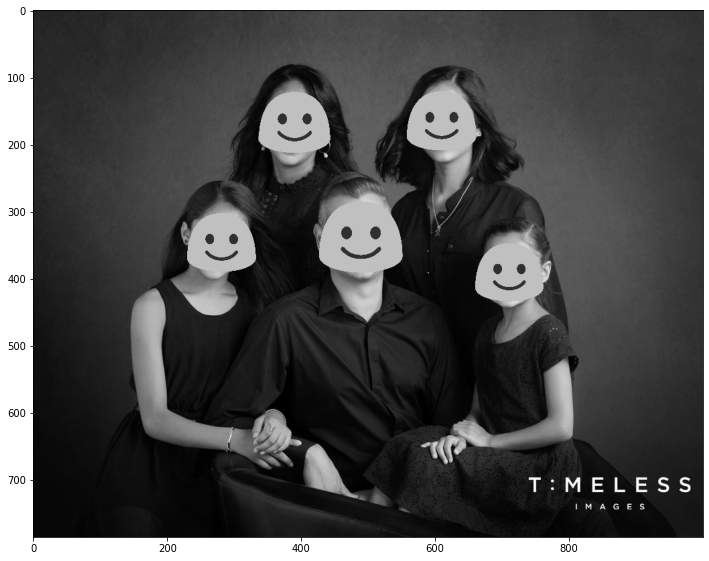

-1

In [26]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

face_detector = cv2.CascadeClassifier('/content/drive/MyDrive/Assignment24/haarcascade_frontalface_default.xml')
image = cv2.imread('/content/drive/MyDrive/Assignment24/family.jpg')
emoji = cv2.imread('/content/drive/MyDrive/Assignment24/emoji1.png', cv2.IMREAD_UNCHANGED)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
emoji_image = emoji[:, :, 0:3]
emoji_image_gray = cv2.cvtColor(emoji_image, cv2.COLOR_BGR2GRAY)
emoji_mask = emoji[:, :, 3]
emoji_mask = emoji_mask / 255

faces = face_detector.detectMultiScale(image_gray, 1.3)
for (x, y, w, h) in faces:
  face = image_gray[y: y + w, x: x + h]

  emoji_image_gray_resized = cv2.resize(emoji_image_gray, (w, h))
  emoji_mask_resized = cv2.resize(emoji_mask, (w, h))

  emoji_image_gray_resized = emoji_image_gray_resized.astype(float) / 255
  face = face.astype(float) / 255

  masked_emoji = cv2.multiply(emoji_image_gray_resized, emoji_mask_resized)
  background = cv2.multiply(face, 1-emoji_mask_resized)
  
  result = cv2.add(background, masked_emoji)
  result *= 255

  image_gray[y: y + w, x: x + h] = result


fig = plt.figure(figsize=(12, 12))
plt.imshow(image_gray, cmap='gray')
plt.show()

cv2.imwrite('/content/drive/MyDrive/Assignment24/family-emoji.jpg',image_gray)
cv2.waitKey(10)


-1

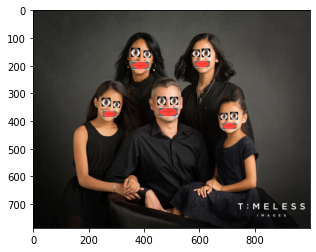

In [ ]:
import cv2 
import matplotlib.pyplot as plt

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml') 
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml') 
smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_smile.xml')

eye = cv2.imread('/content/drive/MyDrive/Assignment24/eye.png')
mouth = cv2.imread('/content/drive/MyDrive/Assignment24/mouth.png')
image = cv2.imread('/content/drive/MyDrive/Assignment24/family.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

faces = face_cascade.detectMultiScale(image_gray, 1.3, 5) 
for (x,y,w,h) in faces:
    roi_gray = image_gray[y:y+h, x:x+w]  
    roi_color = image[y:y+h, x:x+w] 

    eyes = eye_cascade.detectMultiScale(roi_gray) 
    for (ex,ey,ew,eh) in eyes: 
        eye = cv2.resize(eye, (ew, eh))
        roi_color[ey: ey + ew, ex: ex + eh] = eye

    smiles = smile_cascade.detectMultiScale(roi_gray, 1.2, 20)
    for (sx, sy, sw, sh) in smiles:
        mouth = cv2.resize(mouth, (sw, sh))
        roi_color[sy: sy + sh, sx: sx + sw] = mouth

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = np.array(image)
plt.imshow(image)
cv2.imwrite('/content/drive/MyDrive/Assignment24/family-eye-mouth.jpg',image)
cv2.waitKey(10)




-1

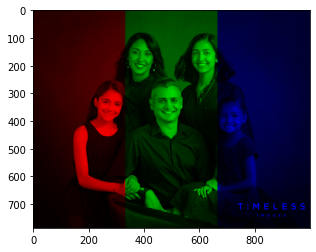

In [ ]:
import cv2 
import matplotlib.pyplot as plt

image = cv2.imread('/content/drive/MyDrive/Assignment24/family.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
rows, cols = image_gray.shape

r = image.copy()
# set blue and green channels to 0
r[:, :, 0] = 0
r[:, :, 1] = 0
image[:,:cols // 3] = r[:,:cols // 3]

g = image.copy()
# set blue and red channels to 0
g[:, :, 0] = 0
g[:, :, 2] = 0
image[:,cols // 3:int(cols / 1.5)] = g[:, cols // 3:int(cols / 1.5)]

b = image.copy()
# set green and red channels to 0
b[:, :, 1] = 0
b[:, :, 2] = 0
image[:,int(cols / 1.5):] = b[:,int(cols / 1.5):]


image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = np.array(image)
plt.imshow(image)
cv2.imwrite('/content/drive/MyDrive/Assignment24/family-3-color.jpg',image)
cv2.waitKey(10)

-1

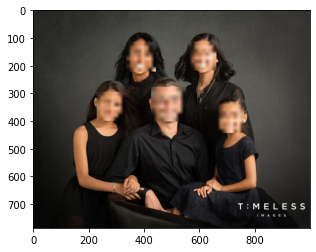

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

face_detector = cv2.CascadeClassifier('/content/drive/MyDrive/Assignment24/haarcascade_frontalface_default.xml')
image = cv2.imread('/content/drive/MyDrive/Assignment24/family.png', cv2.IMREAD_UNCHANGED)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

faces = face_detector.detectMultiScale(image_gray, 1.3)
for (x, y, w, h) in faces:
  roi_gray = image_gray[y:y+h, x:x+w]  
  roi_color = image[y:y+h, x:x+w] 
  roi_color = cv2.resize(roi_color,(8, 8))
  roi_color = cv2.resize(roi_color,(w,h))
  image[y: y + w, x: x + h] = roi_color

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = np.array(image)
plt.imshow(image)
cv2.imwrite('/content/drive/MyDrive/Assignment24/family-plaid.jpg',image)
cv2.waitKey(10)
